# **Controlador de ar condicionado - Lógica Fuzzy**



O problema consiste na implementação de um Sistema Fuzzy controlador de ar condicionado, seguindo as seguintes especificações: 

  * A temperatura pode variar entre **-20 ºC** e **50 ºC**
  * A umidade pode variar entre **0%** e **100%**
  * O funcionamento do ar condicionado, entre **12 ºC** e **35 ºC**

**Temperatura** e **umidade** servem como **valores de entrada do sistema**, inferindo-se a temperatura de funcionamento do ar condicionado de acordo com as seguintes **regras de decisão**:

1. se a **TEMPERATURA** é **BAIXA** então o **SISTEMA** deve funcionar no **AQUECER2**.

2. se a **TEMPERATURA** é **MÉDIA** e a **UMIDADE** é **ALTA** então o **SISTEMA** deve funcionar no **AQUECER**.

3. se a **TEMPERATURA** é **MÉDIA** e a **UMIDADE** é **MÉDIA** ou **BAIXA** então o **SISTEMA** deve permanecer **DESLIGADO**.

4. se a **TEMPERATURA** é **ALTA** e a **UMIDADE** é **BAIXA** então o **SISTEMA** deve funcionar no **ESFRIAR1**.

5. se a **TEMPERATURA** é **ALTA** e a **UMIDADE** é **MÉDIA** ou **ALTA** então o **SISTEMA** deve funcionar no **ESFRIAR2**.


Os conjuntos Fuzzy das regras acima seguem a especificação:


Variável **TEMPERATURA**:

* **BAIXA** - função triangular (-20,-20, 5)

* **MÉDIA** - função triangular (0,10,20)

* **ALTA** - função triangular (15, 50, 50)


Variável **UMIDADE**:

* **BAIXA** - função triangular (0,0, 50)

* **MÉDIA** - função trapezoidal (30,45,55,70)

* **ALTA** - função triangular (55, 100, 100)


Variável **SISTEMA**:

* **ESFRIAR2** - função triangular (12,12, 15)

* **ESFRIAR1** - função trapezoidal (14,15,16,17)

* **DESLIGAR** - função trapezoidal (16,18,19,21)

* **AQUECER1** - função triangular (20, 24, 28)

* **AQUECER2** - função triangular (26, 35, 35)


## Instalação de pacotes necessários

In [ ]:
# Normalmente necessário instalar o pacote skfuzzy
!pip install networkx==2.3
!pip install scikit-fuzzy


## Início da implementação

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Variáveis do problema
TEMPERATURA = ctrl.Antecedent(np.arange(-20, 50, 1), 'TEMPERATURA')
UMIDADE = ctrl.Antecedent(np.arange(0, 100, 1), 'UMIDADE')
SISTEMA = ctrl.Consequent(np.arange(12, 35, 1), 'SISTEMA')


## ATIVIDADE 03 - Altere o método de defuzzificação para os mesmos valores de entrada, analise os resultados e disserte sobre os mesmos.
# Possibilita a escolha do metodo de defuzzificação (exemplo: centroid, bisector, mom, som, lom)
SISTEMA.defuzzify_method = 'centroid'    #centro de massa
#SISTEMA.defuzzify_method = 'bisector'    
#SISTEMA.defuzzify_method = 'mom'        #mean of maximum
#SISTEMA.defuzzify_method = 'som'        #min of maximum
#SISTEMA.defuzzify_method = 'lom'        #max of maximum


## ATIVIDADE 01 - Crie a Função de pertinência.
# Funções de pertinência
TEMPERATURA['BAIXA'] = fuzz.trimf(TEMPERATURA.universe, [-20,-20,5])
TEMPERATURA['MÉDIA'] = fuzz.trimf(TEMPERATURA.universe, [0,10,20])
TEMPERATURA['ALTA'] = fuzz.trimf(TEMPERATURA.universe, [15, 50, 50])

UMIDADE['BAIXA'] = fuzz.trimf(UMIDADE.universe, [0, 0, 50])
UMIDADE['MÉDIA'] = fuzz.trapmf(UMIDADE.universe, [30,45,55,70])
UMIDADE['ALTA'] = fuzz.trimf(UMIDADE.universe, [55,100,100])

SISTEMA['ESFRIAR2'] = fuzz.trimf(SISTEMA.universe, [12,12,15])
SISTEMA['ESFRIAR1'] = fuzz.trapmf(SISTEMA.universe, [14,15,16,17])
SISTEMA['DESLIGAR'] = fuzz.trapmf(SISTEMA.universe, [16,18,19,21])
SISTEMA['AQUECER1'] = fuzz.trimf(SISTEMA.universe, [20,24,28])
SISTEMA['AQUECER2'] = fuzz.trimf(SISTEMA.universe, [26,35,35])

### Visualizando graficamente as funções de pertinência

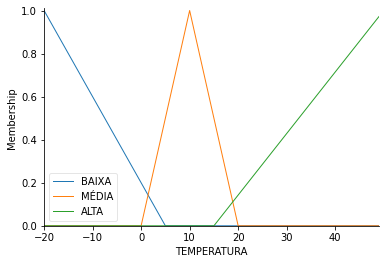

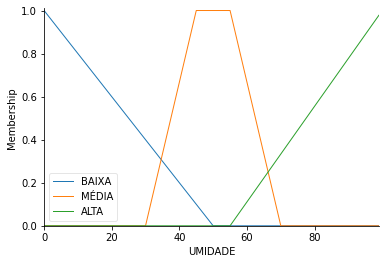

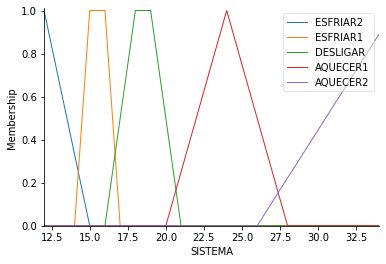

In [ ]:
# Visualização das funções de pertinência:

TEMPERATURA.view()
UMIDADE.view()
SISTEMA.view()

### Definindo as regras de decisão Fuzzy

In [ ]:
# Definição das regras de decisão
rule1 = ctrl.Rule(TEMPERATURA['BAIXA'], SISTEMA['AQUECER2'])
rule2 = ctrl.Rule(TEMPERATURA['MÉDIA'] & UMIDADE['ALTA'], SISTEMA['AQUECER1'])                                # AND LÓGICO = Mínimo
rule3 = ctrl.Rule(TEMPERATURA['MÉDIA'] & (UMIDADE['MÉDIA'] | UMIDADE['BAIXA']), SISTEMA['DESLIGAR'])          # OR LÓGICO = Máximo
rule4 = ctrl.Rule(TEMPERATURA['ALTA'] & UMIDADE['BAIXA'], SISTEMA['ESFRIAR1'])
rule5 = ctrl.Rule(TEMPERATURA['ALTA'] & (UMIDADE['MÉDIA'] | UMIDADE['ALTA']), SISTEMA['ESFRIAR2'])


### Criando e simulando um sistema nebuloso

In [ ]:
# cria o simulador utilizando as regras de decisão
simulador_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
simulador = ctrl.ControlSystemSimulation(simulador_ctrl)

# Entrando com alguns valores de temperatura e umidade:
## TESTE 1:
VALOR_TEMPERATURA = -3
VALOR_UMIDADE = 70

### TESTE 2:
#VALOR_TEMPERATURA = 15
#VALOR_UMIDADE = 80

### TESTE 3:
#VALOR_TEMPERATURA = 18
#VALOR_UMIDADE = 45

### TESTE 4:
#VALOR_TEMPERATURA = 36
#VALOR_UMIDADE = 25        

### TESTE 5:
#VALOR_TEMPERATURA = 36
#VALOR_UMIDADE = 60

# Fornecido como entrada do simulador
simulador.input['TEMPERATURA'] = VALOR_TEMPERATURA
simulador.input['UMIDADE'] = VALOR_UMIDADE

# Computa o resultado
simulador.compute()
RESULTADO = simulador.output['SISTEMA']
print("Resultado numérico: ", RESULTADO)


Resultado numérico:  30.667317073170725


### Exibindo graficamente o resultado

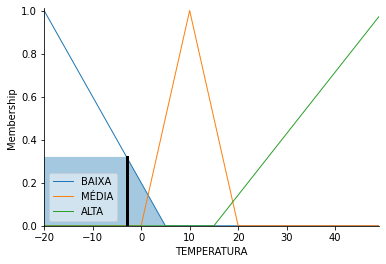

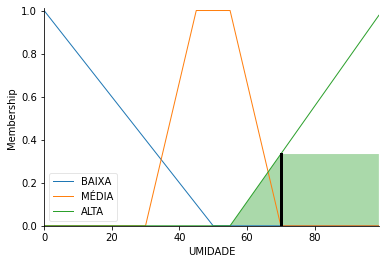

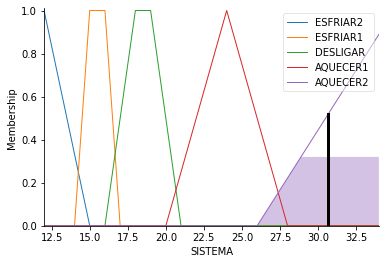

In [ ]:
TEMPERATURA.view(sim=simulador)
UMIDADE.view(sim=simulador)
SISTEMA.view(sim=simulador)


### Imprimindo as pertinências de cada conjunto Fuzzy

Pertinências de TEMPERATURA: 
Pertinência de TEMPERATURA BAIXA: 	0.32
Pertinência de TEMPERATURA MÉDIA: 	0.0
Pertinência de TEMPERATURA ALTA: 	0.0

Pertinências de UMIDADE: 
Pertinência de UMIDADE BAIXA: 		0.0
Pertinência de UMIDADE MÉDIA: 		0.0
Pertinência de UMIDADE ALTA: 		0.3333333333333333

Pertinências de SISTEMA: 
Pertinência de SISTEMA para ESFRIAR2: 	0.0
Pertinência de SISTEMA para ESFRIAR1: 	0.0
Pertinência de SISTEMA para DESLIGAR: 	0.0
Pertinência de SISTEMA para AQUECER1: 	0.0
Pertinência de SISTEMA para AQUECER2: 	0.5185907859078583


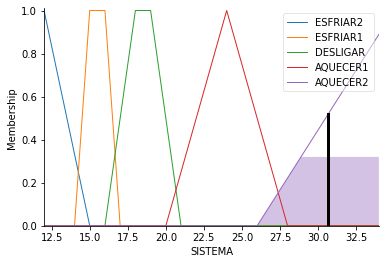

In [ ]:
## Atividade 04 - Mostre a pertinência dos valores de entrada nos seus respectivos conjuntos fuzzy
SISTEMA.view(sim=simulador)

print("Pertinências de TEMPERATURA: ")
print("Pertinência de TEMPERATURA BAIXA: \t" + str(fuzz.interp_membership(TEMPERATURA.universe, TEMPERATURA['BAIXA'].mf, VALOR_TEMPERATURA)))
print("Pertinência de TEMPERATURA MÉDIA: \t" + str(fuzz.interp_membership(TEMPERATURA.universe, TEMPERATURA['MÉDIA'].mf, VALOR_TEMPERATURA)))
print("Pertinência de TEMPERATURA ALTA: \t" + str(fuzz.interp_membership(TEMPERATURA.universe, TEMPERATURA['ALTA'].mf, VALOR_TEMPERATURA)))

print("\nPertinências de UMIDADE: ")
print("Pertinência de UMIDADE BAIXA: \t\t" + str(fuzz.interp_membership(UMIDADE.universe, UMIDADE['BAIXA'].mf, VALOR_UMIDADE)))
print("Pertinência de UMIDADE MÉDIA: \t\t" + str(fuzz.interp_membership(UMIDADE.universe, UMIDADE['MÉDIA'].mf, VALOR_UMIDADE)))
print("Pertinência de UMIDADE ALTA: \t\t" + str(fuzz.interp_membership(UMIDADE.universe, UMIDADE['ALTA'].mf, VALOR_UMIDADE)))

print("\nPertinências de SISTEMA: ")
print("Pertinência de SISTEMA para ESFRIAR2: \t" + str(fuzz.interp_membership(SISTEMA.universe, SISTEMA['ESFRIAR2'].mf, RESULTADO)))
print("Pertinência de SISTEMA para ESFRIAR1: \t" + str(fuzz.interp_membership(SISTEMA.universe, SISTEMA['ESFRIAR1'].mf, RESULTADO)))
print("Pertinência de SISTEMA para DESLIGAR: \t" + str(fuzz.interp_membership(SISTEMA.universe, SISTEMA['DESLIGAR'].mf, RESULTADO)))
print("Pertinência de SISTEMA para AQUECER1: \t" + str(fuzz.interp_membership(SISTEMA.universe, SISTEMA['AQUECER1'].mf, RESULTADO)))
print("Pertinência de SISTEMA para AQUECER2: \t" + str(fuzz.interp_membership(SISTEMA.universe, SISTEMA['AQUECER2'].mf, RESULTADO)))

# Definição das regras de decisão
#rule1 = ctrl.Rule(TEMPERATURA['BAIXA'], SISTEMA['AQUECER2'])
#rule2 = ctrl.Rule(TEMPERATURA['MÉDIA'] & UMIDADE['ALTA'], SISTEMA['AQUECER1'])
#rule3 = ctrl.Rule(TEMPERATURA['MÉDIA'] & (UMIDADE['MÉDIA'] | UMIDADE['BAIXA']), SISTEMA['DESLIGAR'])
#rule4 = ctrl.Rule(TEMPERATURA['ALTA'] & UMIDADE['BAIXA'], SISTEMA['ESFRIAR1'])
#rule5 = ctrl.Rule(TEMPERATURA['ALTA'] & (UMIDADE['MÉDIA'] | UMIDADE['ALTA']), SISTEMA['ESFRIAR2'])